In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [59,76,49,86,19,94,62,84,63,92]
n = len(data)
sorted_data = sorted(data)

total = 0
for val in data:
    total += val
mean = total / n

if n%2 == 0:
    median = (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
else:
    median = sorted_data[n//2]

frequency = {}
for val in data:
    frequency[val] = frequency.get(val,0) + 1
max_freq = max(frequency.values())
mode = [k for k,v in frequency.items() if v == max_freq]

sqd_diffs = [(x-mean)**2 for x in data]
var = sum(sqd_diffs)/n
std_dev = var**0.5

mad = sum(abs(x-mean) for x in data) / n
cv = (std_dev/mean)*100
m3 = sum((x-mean)**3 for x in data) / n
skewness = m3/(std_dev**3)

m4 = sum((x-mean)**4 for x in data) / n
kurtosis = m4/(std_dev**4) - 3

def percentile(data,p):
    k = (len(data) - 1)*(p/100)
    f = int(k)
    c = k - f
    if f+1 < len(data):
        return data[f] + (data[f+1] - data[f]) * c
    else:
        return data[f]
    
q1 = percentile(sorted_data,25)
q3 = percentile(sorted_data,75)
iqr = q3 - q1

print("Mean: ",mean)
print("Median: ",median)
print("Mode: ",mode)
print("Range: ",max(data) - min(data))
print("Variance: ",var)
print("Standard Deviation: ",std_dev)
print("Q1(Percentile): ",q1)
print("Q3(Percentile): ",q3)
print("IQR: ",iqr)
print("Skewness: ",skewness)
print("Kurtosis: ",kurtosis)

Mean:  68.4
Median:  69.5
Mode:  [59, 76, 49, 86, 19, 94, 62, 84, 63, 92]
Range:  75
Variance:  479.84
Standard Deviation:  21.905250512148907
Q1(Percentile):  59.75
Q3(Percentile):  85.5
IQR:  25.75
Skewness:  -0.8514564630078018
Kurtosis:  0.04263226399463527


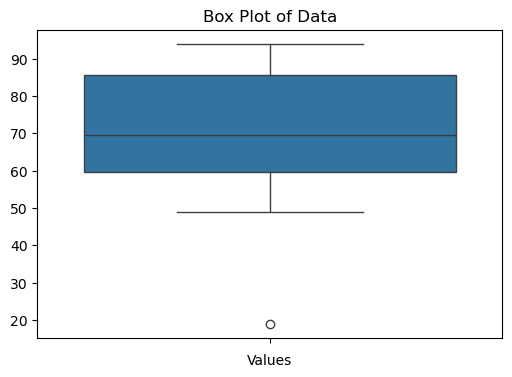

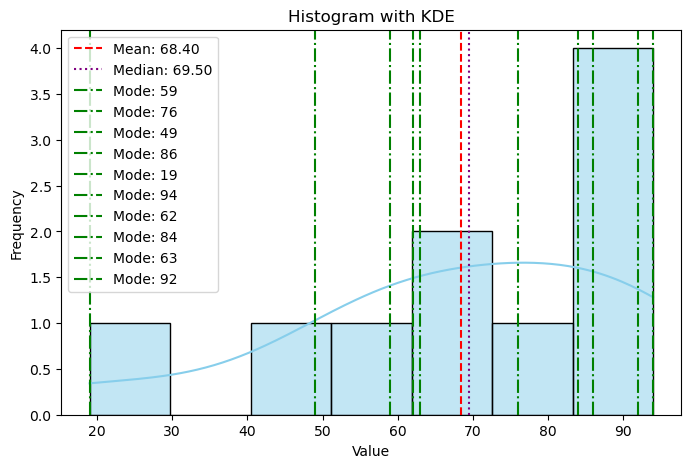

In [2]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.title("Box Plot of Data")
plt.xlabel("Values")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data, bins=7, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
plt.axvline(median, color='purple', linestyle=':', label=f"Median: {median:.2f}")
for m in mode:
    plt.axvline(m, color='green', linestyle='-.', label=f"Mode: {m}")
plt.title("Histogram with KDE")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [4]:
import pandas as pd

df = pd.read_csv('elecBill_unitsUsed.csv')
print(df.columns)

unit_used = df['units_used'].tolist()
elec_bill = df['elec_bill'].tolist()
n = len(unit_used)

mean1 = sum(unit_used) / n
mean2 = sum(elec_bill) / n

sqd_diffs1 = [(x-mean1)**2 for x in unit_used]
sqd_diffs2 = [(y-mean2)**2 for y in elec_bill]

var1 = sum(sqd_diffs1) / n
var2 = sum(sqd_diffs2) / n

std_dev1 = (var1)**0.5
std_dev2 = (var2)**0.5

sum_diffs_mul = sum((x-mean1) * (y-mean2) for x,y in zip(unit_used,elec_bill))
covariance = sum_diffs_mul / n

correlation = covariance / (std_dev1 * std_dev2)

def reg_coeff(covariance,var1,mean1,mean2):
    slope = covariance / var1
    intercept = mean2 - slope * mean1
    return intercept,slope

def cov_matrix(var1,var2,covariance):
    return [[var1,covariance],[var2,covariance]]
   
print(f"Mean of units_used: {mean1:.2f}")
print(f"Mean of electricity bill: {mean2:.2f}")
print(f"Variance of units_used: {var1:.2f}")
print(f"Variance of electricity bill: {var2:.2f}")
print(f"Standard Deviation of units_used: {std_dev1:.2f}")
print(f"Standard Deviation of electricity bill: {std_dev2:.2f}")
print(f"Covariance: {covariance:.2f}")
print(f"Correlation: {correlation:.2f}")

intercept, slope = reg_coeff(covariance,var1,mean1,mean2)
cov_mat = cov_matrix(var1,var2,covariance)

print(f"Linear regression equation: Electricity_bill = {intercept:.2f} + {slope:.2f}*Units_used")

print("\nCovariance Matrix:")
print(f"[[{cov_mat[0][0]:.3f}, {cov_mat[0][1]:.3f}],")
print(f" [{cov_mat[1][0]:.3f}, {cov_mat[1][1]:.3f}]]")

Index(['units_used', 'elec_bill'], dtype='object')
Mean of units_used: 477.40
Mean of electricity bill: 1332.87
Variance of units_used: 34529.71
Variance of electricity bill: 228373.57
Standard Deviation of units_used: 185.82
Standard Deviation of electricity bill: 477.88
Covariance: 88750.01
Correlation: 1.00
Linear regression equation: Electricity_bill = 105.84 + 2.57*Units_used

Covariance Matrix:
[[34529.707, 88750.006],
 [228373.568, 88750.006]]


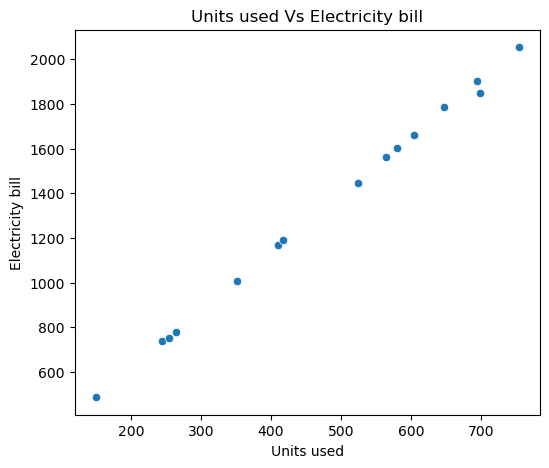

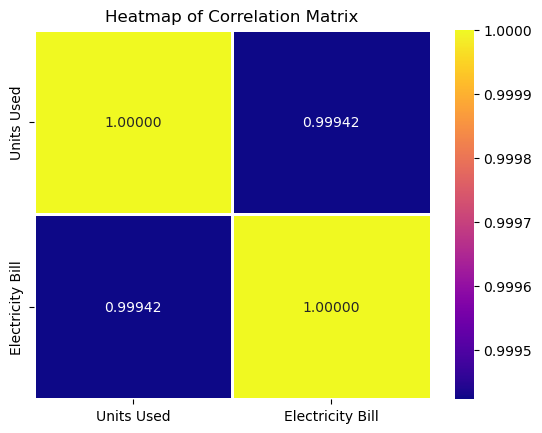

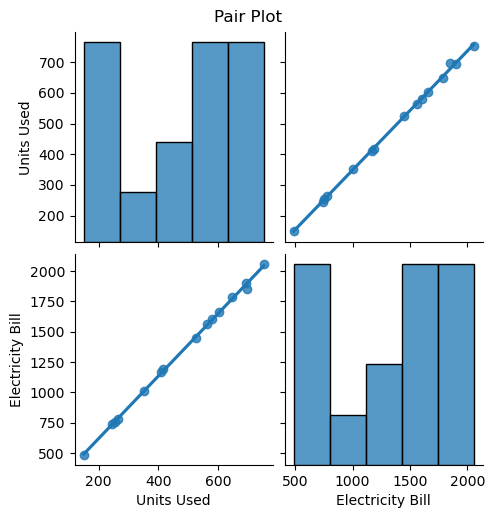

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({ 'Units Used': units_used, 'Electricity Bill': elec_bill})

plt.figure(figsize=(6,5))
sns.scatterplot(x = 'Units Used', y = 'Electricity Bill', data = df)
plt.title("Units used Vs Electricity bill")
plt.xlabel("Units used")
plt.ylabel("Electricity bill")
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='plasma', fmt=".5f", linewidth='1')
plt.title("Heatmap of Correlation Matrix")
plt.show()

sns.pairplot(df, kind='reg')
plt.suptitle("Pair Plot",y = 1.02)
plt.show()

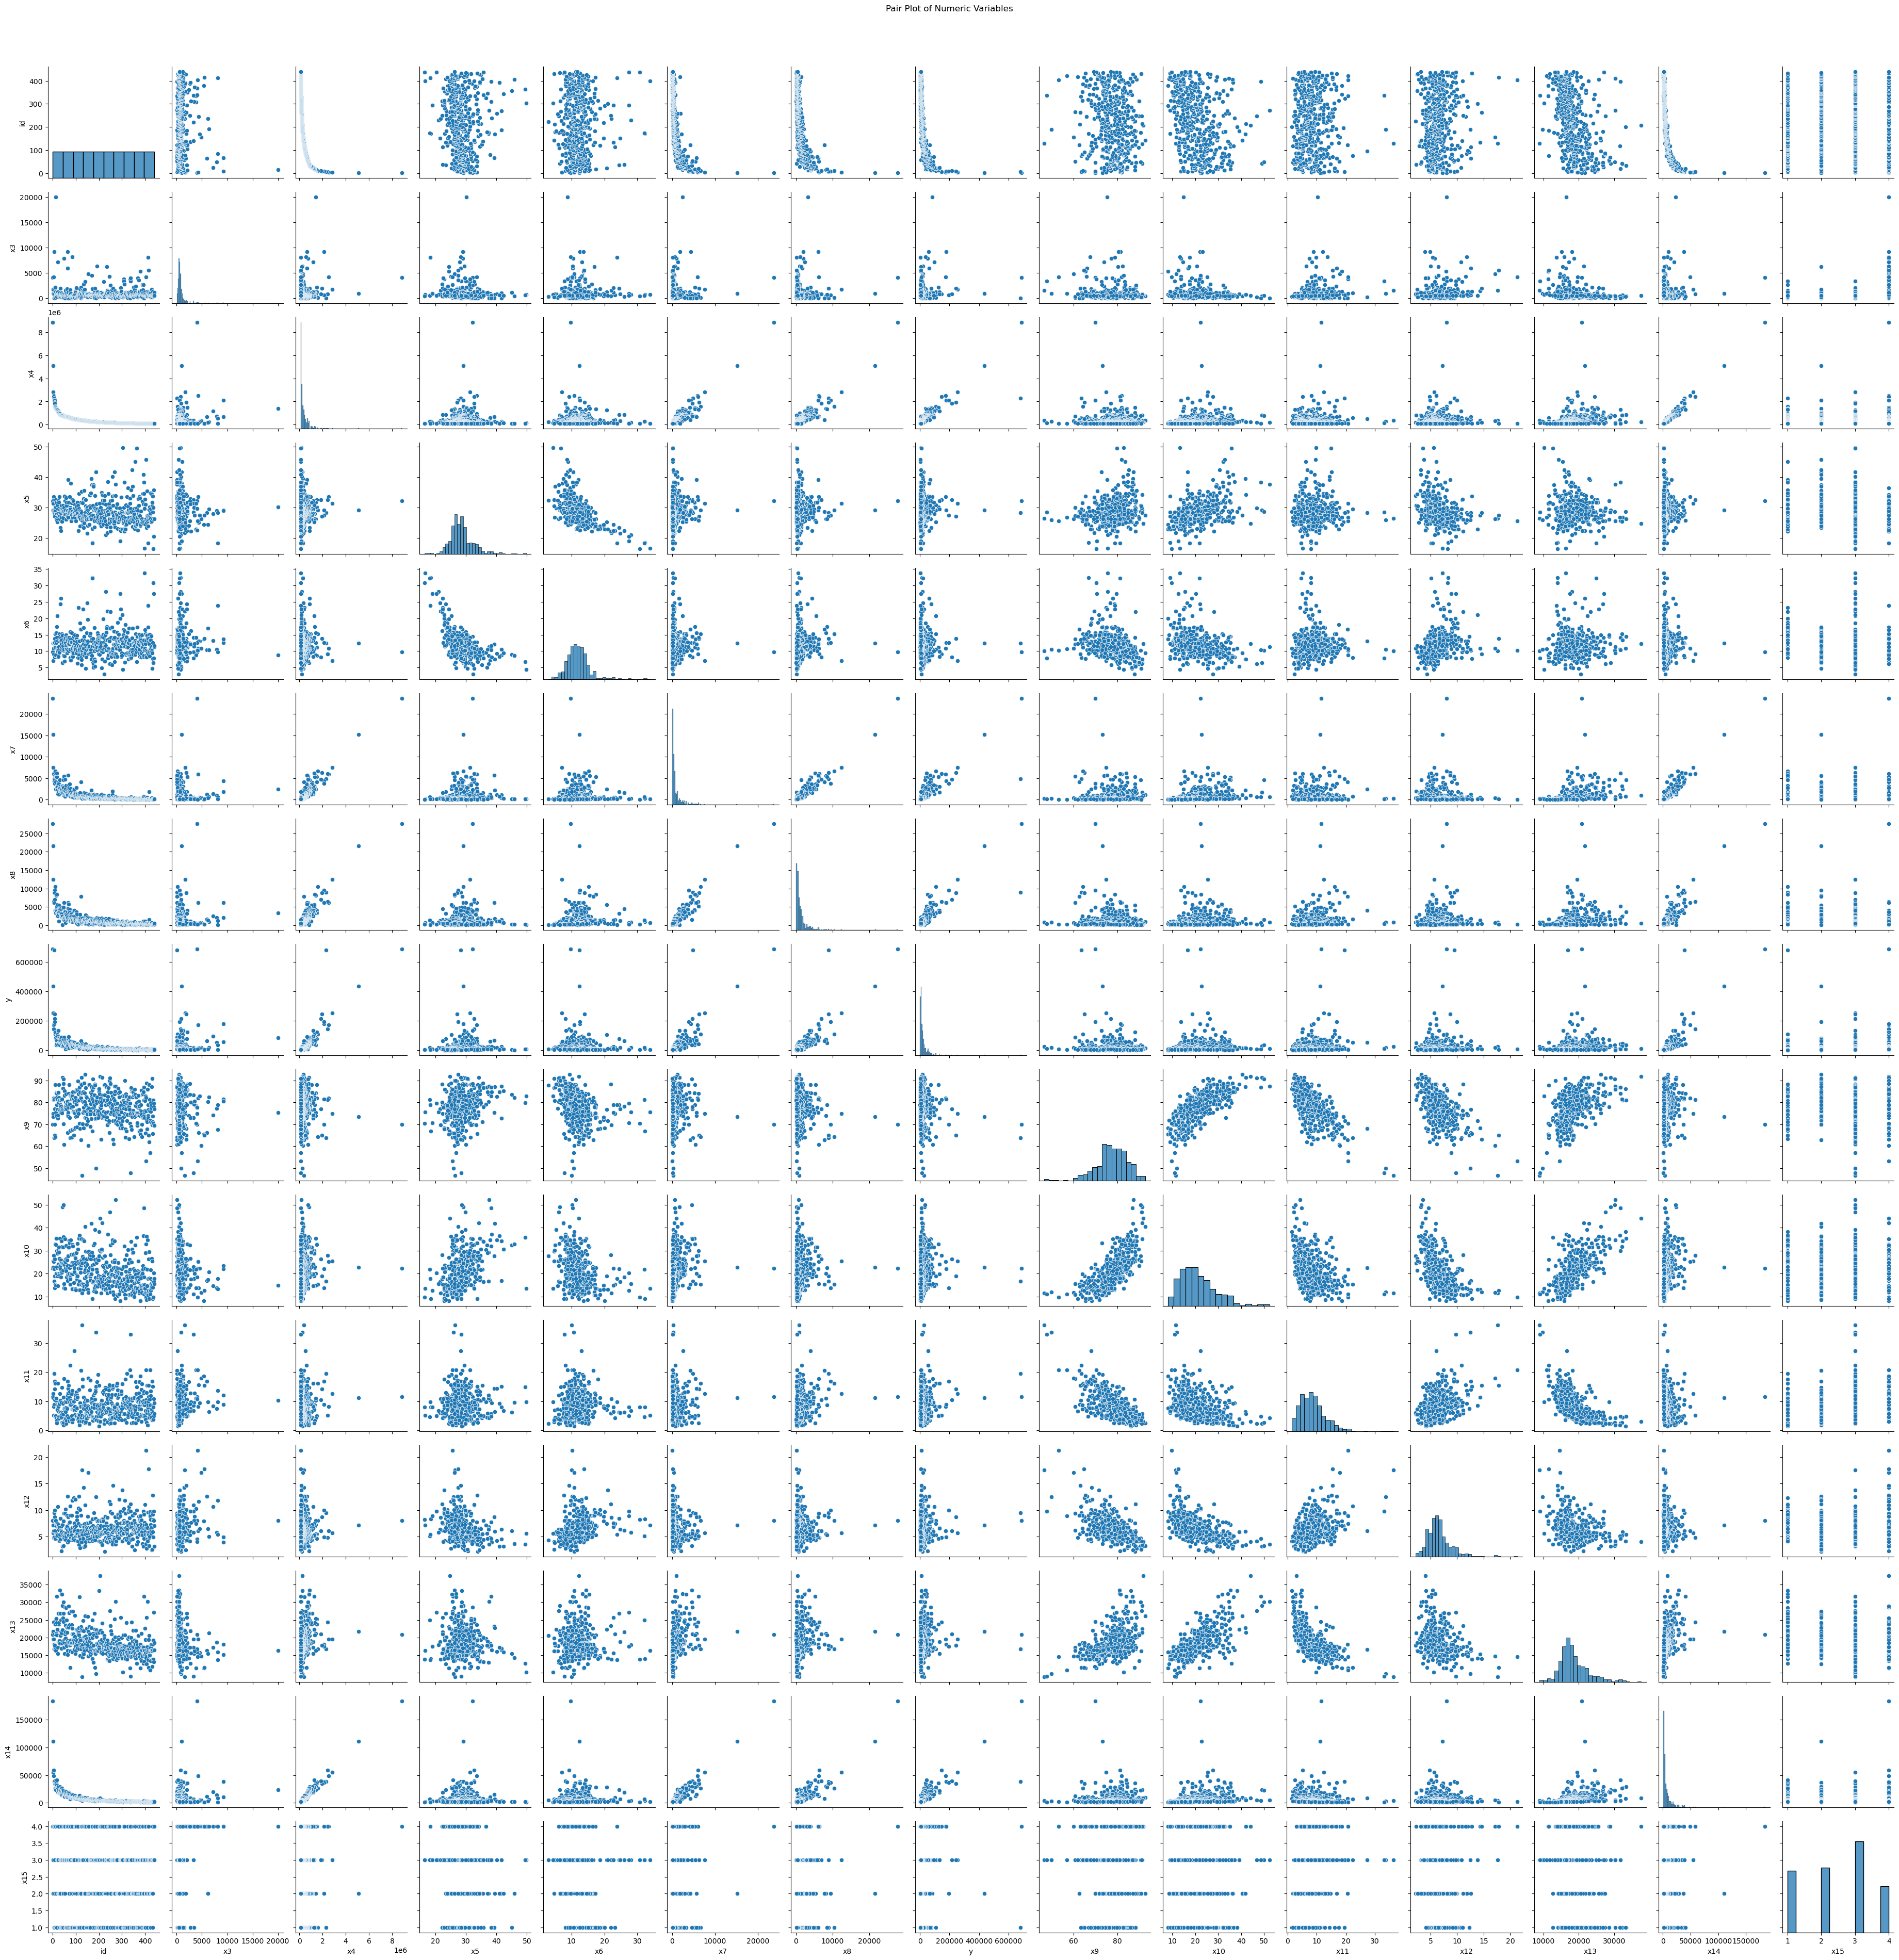

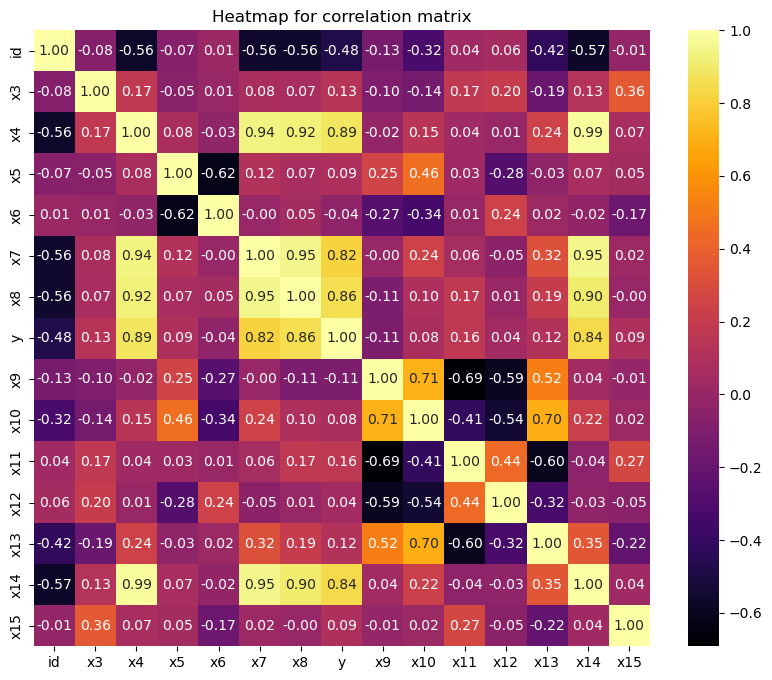

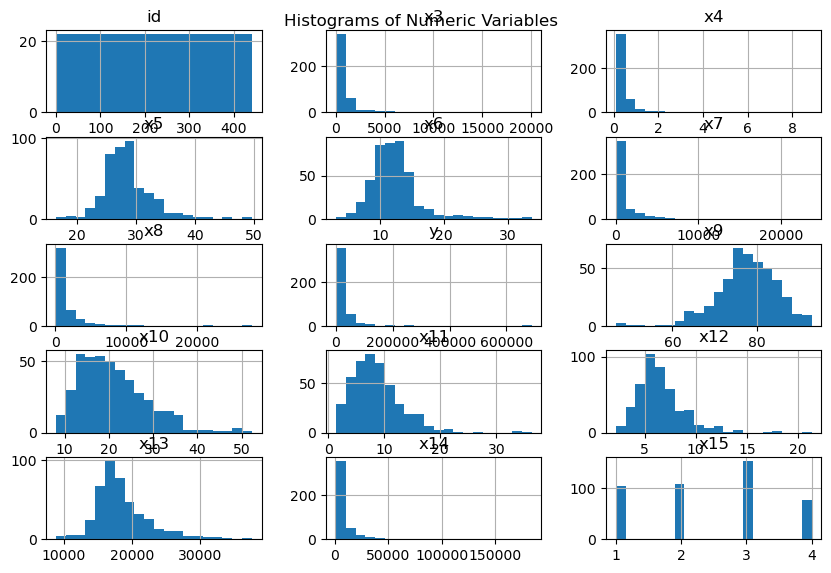

In [8]:
#multivariate dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('multi.csv')

numeric_df = df.select_dtypes(include='number')

#Pair Plot
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

#Correlation Heatmap
corr = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='inferno', square=True)
plt.title('Heatmap for correlation matrix')
plt.show()

#Histograms for each numeric variable
numeric_df.hist(bins=20, figsize=(10,8), layout=(len(numeric_df.columns)//3 + 1, 3))
plt.suptitle('Histograms of Numeric Variables', y=0.9)
plt.show()

